In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "https://raw.githubusercontent.com/shobhit-nigam/knowledgeclan/main/datasets/synth_temp.csv"

In [3]:
dfa = pd.read_csv(path)

In [4]:
dfa

,AverageTemperature,Year
0,12.980258,1841
1,13.689697,1842
2,12.485703,1843
3,14.202069,1844
4,12.831530,1845
...,...,...
1945,19.573018,2006
1946,19.975516,2007
1947,19.617621,2008
1948,19.980084,2009


In [5]:
dfb = dfa[dfa['Year'] > 1901]

In [6]:
dfb.tail(20) # Gives the last x values. Default = 5

,AverageTemperature,Year
1930,18.651364,1991
1931,19.058583,1992
1932,19.224982,1993
1933,19.216401,1994
1934,18.983689,1995
1935,19.276549,1996
1936,19.573677,1997
1937,19.578194,1998
1938,19.558279,1999
1939,19.550557,2000


In [7]:
dfb.shape

(1452, 2)

In [8]:
dfb.index = np.arange(1452)

In [9]:
dfb

,AverageTemperature,Year
0,16.973653,1902
1,17.181773,1903
2,17.436933,1904
3,17.688948,1905
4,17.811166,1906
...,...,...
1447,19.573018,2006
1448,19.975516,2007
1449,19.617621,2008
1450,19.980084,2009


In [10]:
# moving average filter 

In [11]:
dfb[dfb["Year"] ==  2002]

,AverageTemperature,Year
1212,19.977052,2002
1233,19.240852,2002
1254,19.410381,2002
1275,19.457610,2002
1296,19.857071,2002
1317,19.278535,2002
1338,19.507882,2002
1359,19.896580,2002
1380,19.247033,2002
1401,19.929583,2002


In [12]:
dfb_group_year = dfb.groupby("Year").agg(np.mean)

In [13]:
dfb_group_year

,AverageTemperature
Year,
1902,17.438122
1903,17.375456
1904,17.558674
1905,17.740646
1906,17.501770
...,...
2006,19.827744
2007,19.694244
2008,19.793876


In [14]:
dfb.columns

Index(['AverageTemperature', 'Year'], dtype='object')

In [15]:
objr = dfb_group_year['AverageTemperature'].rolling(10).mean() # rolling object r to cal rolling mean for 10 years

In [16]:
objr.head(20)

Year
1902          NaN
1903          NaN
1904          NaN
1905          NaN
1906          NaN
1907          NaN
1908          NaN
1909          NaN
1910          NaN
1911    17.501145
1912    17.502700
1913    17.500737
1914    17.487112
1915    17.466333
1916    17.460069
1917    17.475434
1918    17.463959
1919    17.472423
1920    17.474037
1921    17.480317
Name: AverageTemperature, dtype: float64

In [17]:
dfb_group_year.index

Int64Index([1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year', length=109)

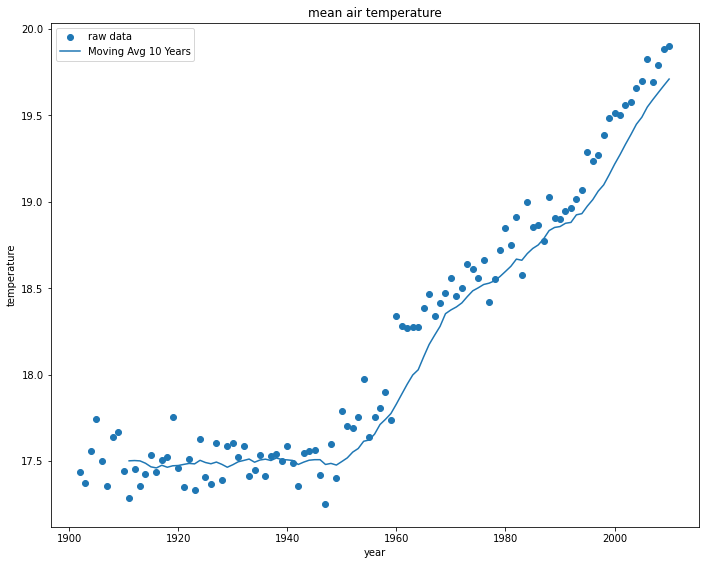

In [18]:
objf = plt.figure(figsize=(9,7))

ax = objf.add_axes([1,1,1,1])

# temp measurement
 
ax.scatter(dfb_group_year.index, dfb_group_year['AverageTemperature'], label = 'raw data')
ax.plot(dfb_group_year.index, objr, label = 'Moving Avg 10 Years')

ax.set_title('mean air temperature')
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.legend()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
model = LinearRegression()

# simple linear regression <br>
Always needs a 2d array

In [21]:
y = dfb.iloc[:,0].values
# independent variable
X = dfb.iloc[:,1:].values
# dependent variable vector

In [22]:
X

array([[1902],
       [1903],
       [1904],
       ...,
       [2008],
       [2009],
       [2010]], dtype=int64)

In [23]:
y

array([16.97365282, 17.18177329, 17.43693268, ..., 19.61762072,
       19.98008381, 20.48283926])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/4, random_state = 3)

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

y_pred

array([17.45048186, 18.13612206, 17.26133974, 18.32526418, 17.04855485,
       18.44347801, 18.11247929, 18.41983525, 19.29461757, 19.27097481,
       17.04855485, 17.68690951, 17.14312591, 19.38918863, 17.47412462,
       18.041551  , 18.7981195 , 19.05818992, 18.75083396, 18.18340759,
       18.39619248, 17.00126931, 16.95398378, 19.27097481, 17.14312591,
       18.30162142, 17.8996944 , 18.98726162, 18.75083396, 19.12911821,
       17.99426547, 19.17640374, 17.23769697, 18.23069312, 17.94697994,
       18.20705036, 18.20705036, 18.53804907, 17.66326675, 17.71055228,
       18.39619248, 16.95398378, 19.12911821, 19.29461757, 16.97762655,
       18.96361885, 18.98726162, 19.01090439, 18.30162142, 18.7981195 ,
       18.23069312, 18.13612206, 19.08183268, 18.86904779, 19.36554587,
       17.68690951, 17.42683909, 17.19041144, 17.85240887, 18.89269056,
       18.06519376, 17.33226803, 17.85240887, 17.16676867, 17.47412462,
       19.27097481, 17.23769697, 17.52141016, 17.42683909, 19.41

In [27]:
y_test

array([17.35461534, 18.1479518 , 17.6097224 , 17.73410565, 18.26665345,
       18.44633669, 18.05273855, 17.95004723, 19.46824235, 19.64749879,
       17.8703323 , 17.18294159, 18.10322991, 19.73969706, 18.44270149,
       18.57065686, 19.40892463, 19.19244943, 18.88635307, 17.87984648,
       18.49367159, 18.1246089 , 18.01413568, 18.86116008, 16.43657244,
       18.04562775, 17.86703251, 19.29725571, 18.81855028, 18.95757346,
       16.93984537, 19.13513626, 17.90767478, 18.16308383, 17.20414087,
       16.92258709, 18.22387094, 18.29824145, 17.56982888, 17.75355833,
       18.88047906, 18.06334343, 19.33644009, 19.46004729, 17.81116622,
       19.03244443, 19.13271396, 19.17463215, 18.52891351, 18.46359426,
       17.54224338, 17.91145879, 19.30101803, 19.12445536, 19.45189047,
       17.41085617, 17.73674938, 17.30782055, 17.91147411, 18.41659226,
       17.08628331, 17.57748788, 16.52497626, 17.70469476, 17.81623579,
       19.71569596, 17.58038414, 18.08602764, 17.93399878, 19.94

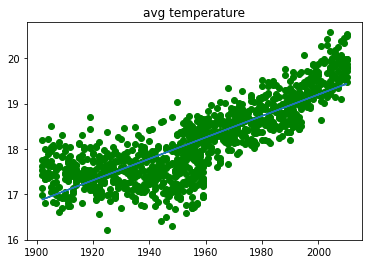

In [28]:
plt.scatter(X_train, y_train, color = 'green') # observation line
plt.plot(X_train, model.predict(X_train)) # regression line

plt.title ("avg temperature")
plt.show()

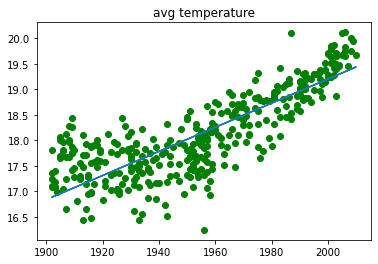

In [29]:
plt.scatter(X_test, y_test, color = 'green') # observation line
plt.plot(X_test, model.predict(X_test)) # regression line

plt.title ("avg temperature")
plt.show()

In [30]:
model.score(X,y)

0.6712375203927147

In [31]:
model.score(X_test,y_test)

0.6472461757854613

In [33]:
X = dfb_group_year.index.values

y = dfb_group_year.iloc[:,0].values

In [34]:
X = X.reshape((-1,1))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/4, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

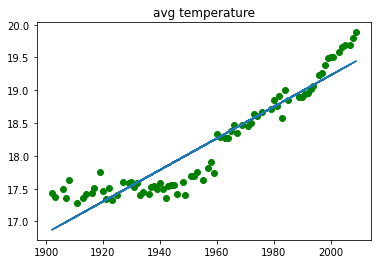

In [37]:
plt.scatter(X_train, y_train, color = 'green') # observation line
plt.plot(X_train, model.predict(X_train)) # regression line

plt.title ("avg temperature")
plt.show()

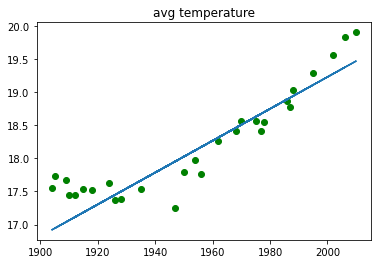

In [38]:
plt.scatter(X_test, y_test, color = 'green') # observation line
plt.plot(X_test, model.predict(X_test)) # regression line

plt.title ("avg temperature")
plt.show()

# Parabolic Method

In [40]:
dfb_group_year['Year'] = dfb_group_year.index


dfb_group_year['Year_square'] = dfb_group_year.index**2

In [41]:
dfb_group_year

,AverageTemperature,Year,Year_square
Year,,,
1902,17.438122,1902,3617604
1903,17.375456,1903,3621409
1904,17.558674,1904,3625216
1905,17.740646,1905,3629025
1906,17.501770,1906,3632836
...,...,...,...
2006,19.827744,2006,4024036
2007,19.694244,2007,4028049
2008,19.793876,2008,4032064


In [ ]:
objf = plt.figure(figsize=(9,7))

ax = objf.add_axes([1,1,1,1])

# temp measurement
 
ax.scatter(dfb_group_year.index, dfb_group_year['AverageTemperature'], label = 'raw data')
ax.plot(dfb_group_year.index, objr, label = 'Moving Avg 10 Years')
ax.plot(dfb_group_year.index, objr, label = 'Moving Avg 10 Years')

ax.set_title('mean air temperature')
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.legend()
plt.show()

In [ ]:
trend_x = [:,0]

In [42]:
dfb_group_year.head(3)

,AverageTemperature,Year,Year_square
Year,,,
1902,17.438122,1902,3617604
1903,17.375456,1903,3621409
1904,17.558674,1904,3625216


In [43]:
X = dfb_group_year[['Year', 'Year_square']]
# independent variable

y = dfb_group_year.iloc[:,0].values
# dependent variable vector

# No resahping req as its a 2d array

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/4, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

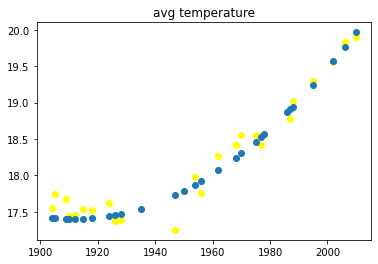

In [45]:
plt.scatter(X_test['Year'], y_test, color = 'yellow') # observation line
plt.scatter(X_test['Year'], y_pred) # regression line

plt.title ("avg temperature")
plt.show()

In [ ]:
model.score(y_test, y_pred)

# Least Squares Method

Get mean values of x and y, calculate gradient m by multiplying the differences between orignal value and mean

x,y <br> 
x_mean, y_mean  <br>
m = sum((x-x_mean) (y - y_mean))/sum(x-x_mean)^2 <br>
b = y_mean - m*x_mean <br>
